In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [4]:
path = "../../../data/"
file_name = path + "Carbon-Data-ALPIDE-CHIP-Longitudinal/151218_04237.csv"
conv = {"column": lambda vol: vol.strip("[]").split(";"),
        "row": lambda vol: vol.strip("[]").split(";")}
df = pd.read_csv(file_name, converters=conv)

In [5]:
df.drop(['ru_id', 'stave_id', 'chip_id'], axis="columns", inplace=True)
df.sample(n=10)

,frame_id,abs_time,bunch_counter,column,row
817,11346400.0,1.335260e+09,46,"[649, 648, 649, 649, 648, 650, 650]","[177, 178, 178, 179, 179, 178, 179]"
2962,66683500.0,2.381610e+09,11,[829],[478]
3976,108712000.0,7.555480e+08,133,"[129, 157, 157, 157, 152]","[61, 317, 317, 275, 448]"
3095,66684700.0,2.528730e+09,187,"[759, 759, 760, 760, 761]","[61, 62, 61, 62, 62]"
2768,66681900.0,2.197410e+09,85,[331],[267]
871,11346900.0,1.399220e+09,65,"[773, 774]","[304, 304]"
3286,66686200.0,2.715570e+09,74,"[153, 153, 155, 154, 154, 155, 155, 154, 156, ...","[188, 189, 187, 187, 188, 188, 189, 189, 186, ..."
1704,34640700.0,3.288260e+09,107,"[53, 53, 55, 54, 54, 55, 631, 631, 632, 829]","[415, 416, 415, 415, 416, 416, 204, 205, 204, ..."
1444,34638600.0,3.039860e+09,153,[829],[478]
3037,66684200.0,2.473170e+09,5,"[413, 415, 414, 414, 415, 415, 414]","[388, 387, 387, 388, 388, 389, 389]"


* Each row has 'column' and 'row' feature.
* I can make a photo of protons with 'column' and 'row'
* The graph below is for 6data in head and 6data in tail concerning to the column*row picture

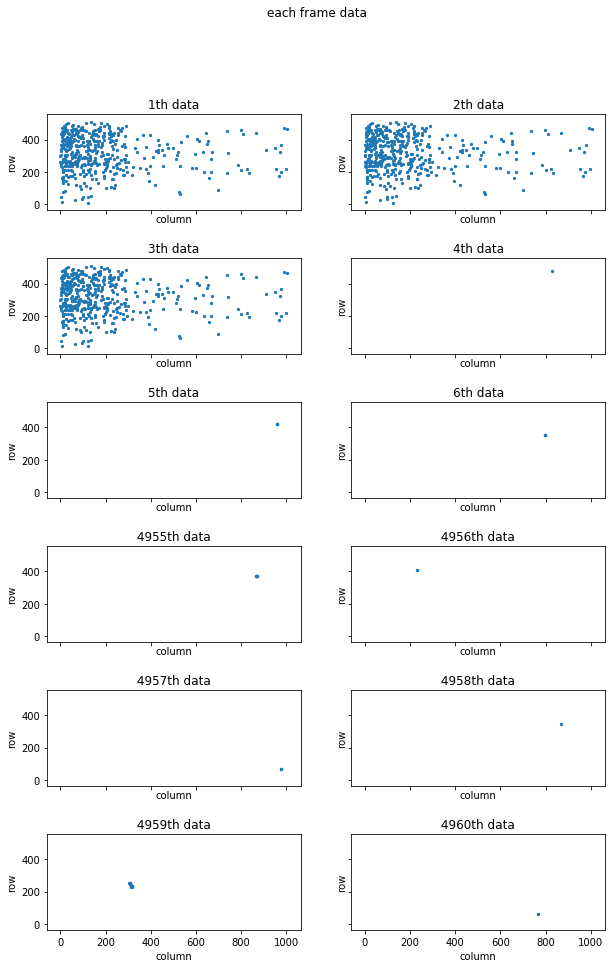

In [6]:
fig,ax = plt.subplots(6,2, sharex=True, sharey=True)
plt.suptitle("each frame data")
i=0
j=0
while i < 6:
    row_df = df.iloc[i,:]
    column = row_df['column']
    column = list(map(float,column))
    row = row_df['row']
    row = list(map(float,row))
    ax[int(i/2)][i%2].scatter(column,row, s=5)
    ax[int(i/2)][i%2].set_xlabel("column")
    ax[int(i/2)][i%2].set_ylabel("row")
    ax[int(i/2)][i%2].title.set_text("{}th data".format(i+1))
    i = i + 1
i = i - 1
while i >= 0:
    row_df = df.iloc[4959-i,:]
    column = row_df['column']
    column = list(map(float,column))
    row = row_df['row']
    row = list(map(float,row))
    ax[5-int(i/2)][1-(i%2)].scatter(column,row, s=5)
    ax[5-int(i/2)][1-(i%2)].set_xlabel("column")
    ax[5-int(i/2)][1-(i%2)].set_ylabel("row")
    ax[5-int(i/2)][1-(i%2)].title.set_text("{}th data".format(4960-i))
    i = i - 1
fig.set_size_inches(10,15)
plt.subplots_adjust(hspace = 0.5) # to adjust the position of the graph
plt.show()

* 1~3th graph has a lot of scatter.
* Others have few scatter.

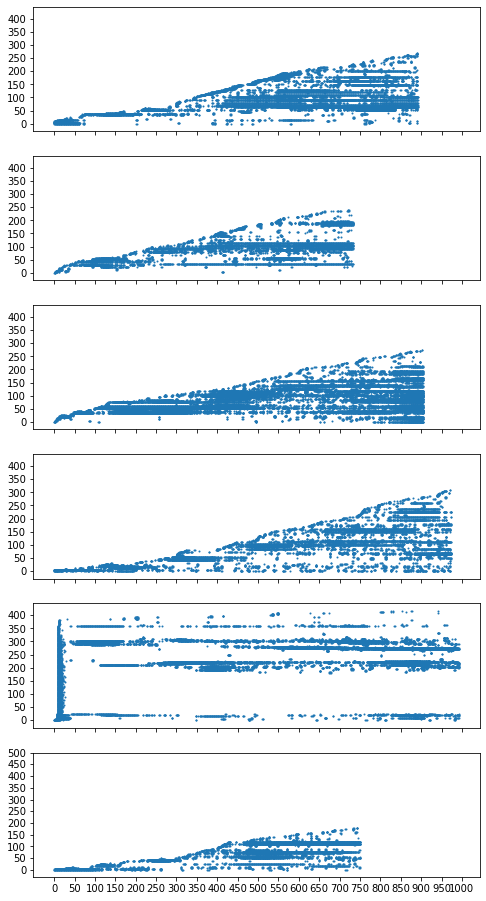

In [7]:
fig,ax = plt.subplots(6, sharex=True, sharey=True)
ax[0].scatter(df.iloc[1382,:]['column'],df.iloc[1382,:]['row'],s=1)
ax[1].scatter(df.iloc[1383,:]['column'],df.iloc[1383,:]['row'],s=1)
ax[2].scatter(df.iloc[1384,:]['column'],df.iloc[1384,:]['row'],s=1)
ax[3].scatter(df.iloc[1385,:]['column'],df.iloc[1385,:]['row'],s=1)
ax[4].scatter(df.iloc[1386,:]['column'],df.iloc[1386,:]['row'],s=1)
ax[5].scatter(df.iloc[1387,:]['column'],df.iloc[1387,:]['row'],s=1)
fig.set_size_inches(8,16)
plt.xticks(np.arange(0,1024,step=50),np.arange(0,1024,step=50))
plt.yticks(np.arange(0,512,step=50),np.arange(0,512,step=50))
plt.show()

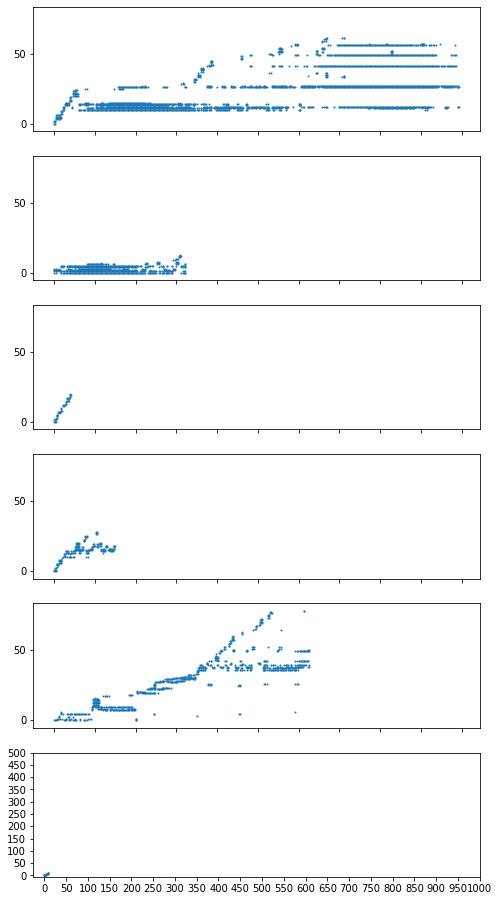

In [8]:
fig,ax = plt.subplots(6, sharex=True, sharey=True)
ax[0].scatter(df.iloc[3266,:]['column'],df.iloc[3266,:]['row'],s=1)
ax[1].scatter(df.iloc[3267,:]['column'],df.iloc[3267,:]['row'],s=1)
ax[2].scatter(df.iloc[3268,:]['column'],df.iloc[3268,:]['row'],s=1)
ax[3].scatter(df.iloc[3269,:]['column'],df.iloc[3269,:]['row'],s=1)
ax[4].scatter(df.iloc[3270,:]['column'],df.iloc[3270,:]['row'],s=1)
ax[5].scatter(df.iloc[3271,:]['column'],df.iloc[3271,:]['row'],s=1)
fig.set_size_inches(8,16)
plt.xticks(np.arange(0,1024,step=50),np.arange(0,1024,step=50))
plt.yticks(np.arange(0,512,step=50),np.arange(0,512,step=50))
plt.show()

Make lists of 'column' and 'row' data into each column.

In [9]:
#https://stackoverflow.com/questions/53218931/how-to-unnest-explode-a-column-in-a-pandas-dataframe/53218939#53218939

def unnesting(df, explode):
    idx = df.index.repeat(df[explode[0]].str.len())
    df1 = pd.concat([
        pd.DataFrame({x: np.concatenate(df[x].values)}) for x in explode], axis=1)
    df1.index = idx
    return df1.join(df.drop(explode, 1), how='left').reset_index(drop=True)

df_unnested = unnesting(df, ['column', 'row'])

* I want to convert ``df``'s each numerical value into ``int`` value.
* I have to check if there is null value or not. If there is null value, put 0.

In [10]:
df_unnested = df_unnested.apply(pd.to_numeric) # Object to float
print(df_unnested['column'].isnull().sum())
print(df_unnested['row'].isnull().sum())
print(df_unnested.describe())

19
19
             column           row      frame_id      abs_time  bunch_counter
count  2.094527e+06  2.094527e+06  2.094546e+06  2.094546e+06   2.094546e+06
mean   5.736210e+02  2.486499e+02  4.401952e+07  2.042116e+09   1.125042e+02
std    2.916123e+02  1.140350e+02  3.570488e+07  1.286816e+09   7.150900e+01
min    0.000000e+00  0.000000e+00  1.000000e+00  9.022900e+04   0.000000e+00
25%    3.530000e+02  1.670000e+02  1.134750e+07  4.198980e+08   4.100000e+01
50%    6.010000e+02  2.520000e+02  3.464250e+07  2.519900e+09   1.170000e+02
75%    8.260000e+02  3.290000e+02  7.355740e+07  3.616700e+09   1.730000e+02
max    1.023000e+03  5.110000e+02  1.294870e+08  4.294940e+09   2.550000e+02


* There are 19 null values in ``column`` and ``row``
* I put average value into null values

In [11]:
# fill with average value
df_unnested['column'].fillna(6, inplace=True)
df_unnested['row'].fillna(2, inplace=True)
print(df_unnested.head())


   column    row  frame_id      abs_time  bunch_counter
0     1.0   48.0       1.0  3.949260e+09             54
1     1.0  239.0       1.0  3.949260e+09             54
2     0.0  263.0       1.0  3.949260e+09             54
3     0.0  297.0       1.0  3.949260e+09             54
4     1.0  305.0       1.0  3.949260e+09             54


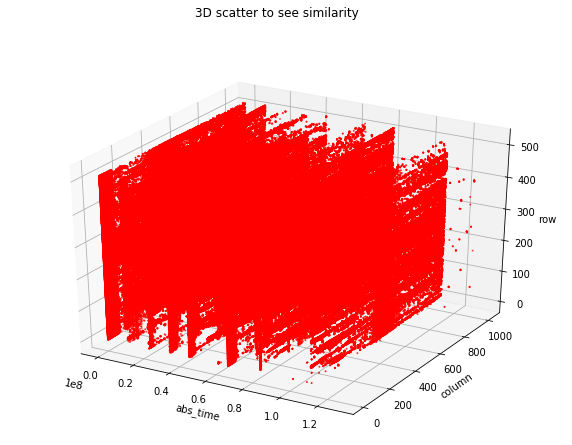

In [12]:
fig = plt.figure()
ax = fig.gca(projection = '3d')
ax.scatter(df_unnested['frame_id'],df_unnested['column'],df_unnested['row'], s=1, c='red')
ax.set_xlabel("abs_time")
ax.set_ylabel("column")
ax.set_zlabel("row")
plt.suptitle("3D scatter to see similarity")
fig.set_size_inches(10,7)
plt.show()

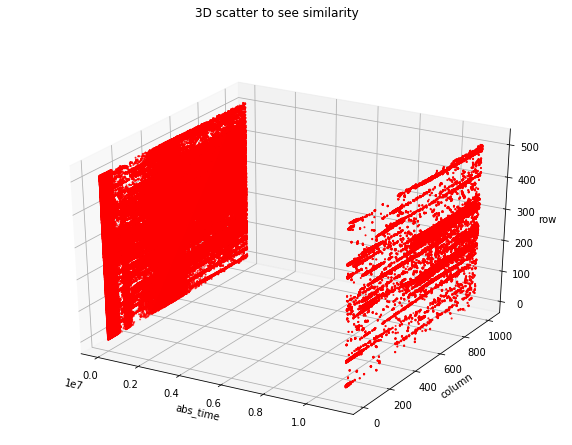

In [13]:
df_1 = df_unnested.iloc[:5*10**5,:]
df_2 = df_unnested.iloc[5*10**5:10**6,:]
df_3 = df_unnested.iloc[10**6:15*10**5,:]
df_4 = df_unnested.iloc[15*10**5:,:]
fig = plt.figure()
ax = fig.gca(projection = '3d')
ax.scatter(df_1['frame_id'],df_1['column'],df_1['row'], s=1, c='red')
ax.set_xlabel("abs_time")
ax.set_ylabel("column")
ax.set_zlabel("row")
plt.suptitle("3D scatter to see similarity")
fig.set_size_inches(10,7)
plt.show()

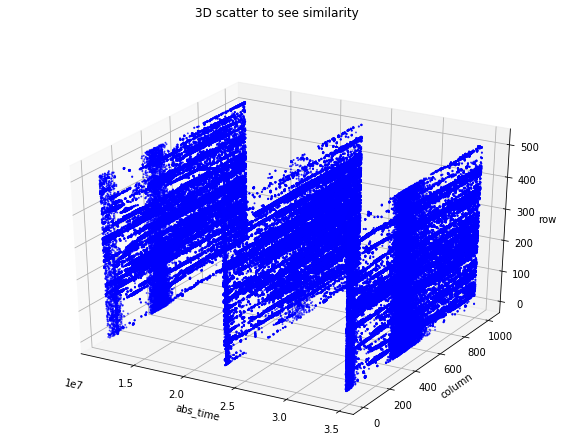

In [14]:
df_1 = df_unnested.iloc[:5*10**5,:]
df_2 = df_unnested.iloc[5*10**5:10**6,:]
df_3 = df_unnested.iloc[10**6:15*10**5,:]
df_4 = df_unnested.iloc[15*10**5:,:]
fig = plt.figure()
ax = fig.gca(projection = '3d')
ax.scatter(df_2['frame_id'],df_2['column'],df_2['row'], s=1, c='blue')
ax.set_xlabel("abs_time")
ax.set_ylabel("column")
ax.set_zlabel("row")
plt.suptitle("3D scatter to see similarity")
fig.set_size_inches(10,7)
plt.show()

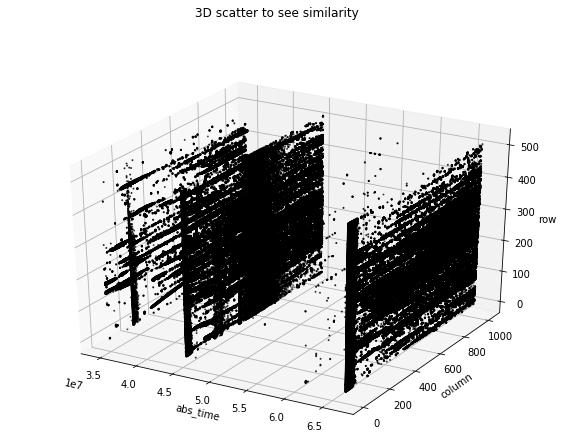

In [15]:
df_1 = df_unnested.iloc[:5*10**5,:]
df_2 = df_unnested.iloc[5*10**5:10**6,:]
df_3 = df_unnested.iloc[10**6:15*10**5,:]
df_4 = df_unnested.iloc[15*10**5:,:]
fig = plt.figure()
ax = fig.gca(projection = '3d')
ax.scatter(df_3['frame_id'],df_3['column'],df_3['row'], s=1, c='black')
ax.set_xlabel("abs_time")
ax.set_ylabel("column")
ax.set_zlabel("row")
plt.suptitle("3D scatter to see similarity")
fig.set_size_inches(10,7)
plt.show()

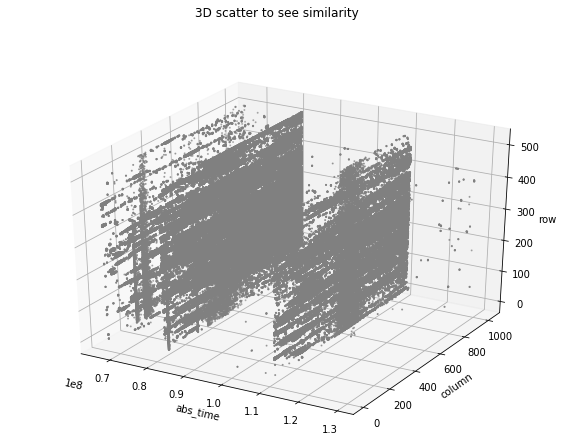

In [16]:
df_1 = df_unnested.iloc[:5*10**5,:]
df_2 = df_unnested.iloc[5*10**5:10**6,:]
df_3 = df_unnested.iloc[10**6:15*10**5,:]
df_4 = df_unnested.iloc[15*10**5:,:]
fig = plt.figure()
ax = fig.gca(projection = '3d')
ax.scatter(df_4['frame_id'],df_4['column'],df_4['row'], s=1, c='gray')
ax.set_xlabel("abs_time")
ax.set_ylabel("column")
ax.set_zlabel("row")
plt.suptitle("3D scatter to see similarity")
fig.set_size_inches(10,7)
plt.show()

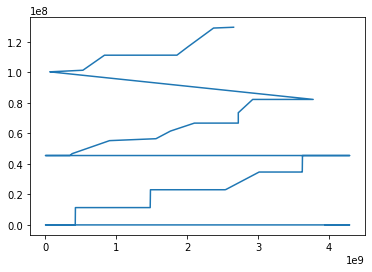

In [17]:
fig = plt.figure()
plt.plot(df['abs_time'],df['frame_id'])
plt.show()